<a href="https://colab.research.google.com/github/ToHLz/Machine-learning/blob/main/Car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [4]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Checking the number of rows and columns
df.shape

(205, 26)

In [6]:
# Checking for missing values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

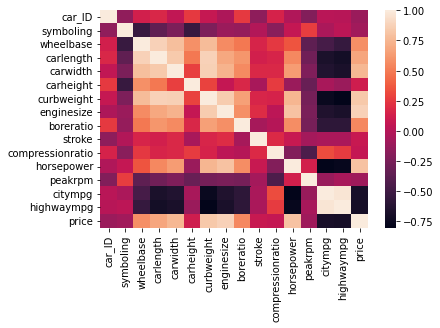

In [7]:
# Visualizing the data

sns.heatmap(df.corr())

In [8]:
data = df.drop(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
                'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                'horsepower', 'peakrpm'], axis=1)

data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,26,27,22470.0


In [9]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['CarName'] = Le.fit_transform(data['CarName'])
data['fueltype'] = Le.fit_transform(data['fueltype'])
data['aspiration'] = Le.fit_transform(data['aspiration'])
data['doornumber'] = Le.fit_transform(data['doornumber'])
data['carbody'] = Le.fit_transform(data['carbody'])
data['drivewheel'] = Le.fit_transform(data['drivewheel'])
data['enginelocation'] = Le.fit_transform(data['enginelocation'])
data['enginetype'] = Le.fit_transform(data['enginetype'])
data['cylindernumber'] = Le.fit_transform(data['cylindernumber'])
data['fuelsystem'] = Le.fit_transform(data['fuelsystem'])

data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5,23,28,16845.0
201,138,1,1,0,3,2,0,3,2,5,19,25,19045.0
202,140,1,0,0,3,2,0,5,3,5,18,23,21485.0
203,142,0,1,0,3,2,0,3,3,3,26,27,22470.0


# **Defined X and Y**

In [10]:
# Splitting into x and y
X = data.iloc[:, :-1].values
y = data.price

In [11]:
X.shape

(205, 12)

In [12]:
y.shape

(205,)

# **Splitting the dataset into training and testing set**

In [13]:
# Splitting into training and dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=5)

In [14]:
# Scaling the X data so that the model can work well with it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[0:10]

array([[0.73287671, 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.66666667, 0.33333333, 0.83333333,
        0.27777778, 0.18421053],
       [0.32191781, 1.        , 0.        , 0.        , 0.75      ,
        1.        , 0.        , 0.5       , 0.33333333, 0.16666667,
        0.30555556, 0.34210526],
       [0.40410959, 1.        , 0.        , 0.        , 0.75      ,
        0.5       , 0.        , 0.5       , 0.33333333, 0.16666667,
        0.36111111, 0.42105263],
       [0.58219178, 1.        , 0.        , 0.        , 0.75      ,
        1.        , 0.        , 0.33333333, 0.33333333, 0.83333333,
        0.16666667, 0.21052632],
       [0.        , 1.        , 0.        , 1.        , 0.75      ,
        0.5       , 0.        , 0.5       , 0.33333333, 0.16666667,
        0.5       , 0.55263158],
       [0.78767123, 1.        , 0.        , 0.        , 0.5       ,
        0.5       , 0.        , 0.5       , 0.33333333, 0.16666667,
        0.41666667,

# **Training the model and predicting with the model**

In [16]:
# Fitting the linear regressor model, to the training set
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [17]:
# Prediction using the test data
prediction = LR.predict(X_test)
print(prediction)

[ 4557.19772146  5888.65496413 17191.14447232 22460.5242273
  9180.12775339 15284.96187244 20310.9466535   9027.70122146
  7334.76777341  6343.28445632  9106.8163152   9070.99826606
  5383.88423733 12996.87557683  9876.96908488  7069.55556252
 15568.15793562 28236.46153207  6988.85873377  7024.66018758
  5311.53355112 12891.76606077 11875.82899441 18320.32055419
 10648.27785464 13287.82786928 16435.98259522  5379.37249282
 15284.96187244  7772.08692808  8535.3801714   6941.56287204
 15634.52261613 15111.30248448 10645.34837489  7227.40127791
 17067.00081143 24476.58270118 35567.60796201  7551.72031356
 10991.72473168 19166.89711346  8264.33834709  7165.42626021
 14947.89352176 17590.20402175 19683.88367379  8861.89120824
 28891.34104246 19683.88367379 10407.94441046  7728.78988349
 17110.29785602 13266.74838221  4964.68518004 20693.49766586
 14577.09269347 21536.41101796 14353.22930529 13965.15565897
 14541.17381405 15041.86577614]


# **Model Evaluation**

In [18]:
from numpy import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
math.sqrt(mean_squared_error(y_test, prediction))

4388.020282123667

In [20]:
r2_score(y_test, prediction)

0.717930214514302

## **Trying Gradient Descent**

In [23]:
# Assigning features to X and Y

X = data[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'citympg', 'highwaympg']]
y = data[['price']]
X

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,citympg,highwaympg
0,2,1,0,1,0,2,0,0,2,5,21,27
1,3,1,0,1,0,2,0,0,2,5,21,27
2,1,1,0,1,2,2,0,5,3,5,19,26
3,4,1,0,0,3,1,0,3,2,5,24,30
4,5,1,0,0,3,0,0,3,1,5,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5,23,28
201,138,1,1,0,3,2,0,3,2,5,19,25
202,140,1,0,0,3,2,0,5,3,5,18,23
203,142,0,1,0,3,2,0,3,3,3,26,27


In [28]:
# Adding a column of 1s as an intercept to X
# The intercept column is needed for convienent matrix representation of cost function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X['intercept'] = 1
X = X.reindex(['intercept', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'citympg', 'highwaympg'], axis=1)
X.head()

,intercept,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,citympg,highwaympg
0,1,2,1,0,1,0,2,0,0,2,5,21,27
1,1,3,1,0,1,0,2,0,0,2,5,21,27
2,1,1,1,0,1,2,2,0,5,3,5,19,26
3,1,4,1,0,0,3,1,0,3,2,5,24,30
4,1,5,1,0,0,3,0,0,3,1,5,18,22


In [29]:
# Convert the X and y to arrays
X = np.array(X)
y = np.array(y)

In [31]:
# Theta is the vector representing coefficients (intercepts, CarName	fueltype	aspiration	doornumber	carbody	drivewheel	
# enginelocation	enginetype	cylindernumber	fuelsystem	citympg	highwaympg)
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iterations = 100

In [32]:
# define the cost function
# take in theta (current value of coefficients b0,b1,b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [33]:
# gradient descent
# takes in current X, y, Learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
  theta = np.zeros(X.shape[1])
  m = len(X)
  gdm_df = pd.DataFrame( columns = ['Bets', 'Cost'])

  for i in range (iterations):
    gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
    theta = theta - alpha * gradient
    cost = compute_cost(X, y, theta)
    gdm_df.loc[i] = [theta, cost]

  return gdm_df

In [34]:
# print cost with various values of coefficient b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

ValueError: ignored